In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types


Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2.mplstyle, line 35 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_modern.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_serif.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an

Welcome to JupyROOT 6.24/06


In [2]:
base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240307_treefit/'


In [3]:
generic_ccbar = base_file_loc + 'ccbar/*.root'

generic_uubar = base_file_loc + 'uubar/*.root'
generic_ddbar = base_file_loc + 'ddbar/*.root'
generic_ssbar = base_file_loc + 'ssbar/*.root'
generic_charged = base_file_loc + 'charged/*.root'
generic_mixed = base_file_loc + 'mixed/*.root'
generic_taupair = base_file_loc + 'taupair/*.root'

In [4]:
base_filter='D0_M>0'


In [7]:
tree = 'etaeta_pipi_tag'
variables = ["__experiment__", "__run__", "__event__",\
             "D0_M","D0_isSignal","Dstarp_delM","Dstarp_CMS_p","Dstarp_isSignal",\
             "Dstarp_cosAngleBetweenMomentumAndVertexVector","Dstarp_cosAngleBetweenMomentumAndVertexVectorInXYPlane",\
             "D0_cosAngleBetweenMomentumAndVertexVector","D0_cosAngleBetweenMomentumAndVertexVectorInXYPlane",\
             "Eta_1_isSignal", "Eta_1_M","Eta_1_p","Eta_1_isSignal",\
             "Eta_2_isSignal", "Eta_2_M","Eta_2_p","Eta_2_isSignal",\
             "pipi_eta1_Pi0_M","pipi_eta1_Pi0_daughterDiffOfPhi_0_1","pipi_eta1_Pi0_daughterAngle_0_1",\
             "pipi_eta2_Pi0_M","pipi_eta2_Pi0_daughterDiffOfPhi_0_1","pipi_eta2_Pi0_daughterAngle_0_1",\
             #"gamma1_E","gamma1_clusterNHits","gamma1_clusterReg",\
             #"gamma2_E","gamma2_clusterNHits","gamma2_clusterReg",\
             #"dM_pi0","ROE_Mgg",'veto_isSignal',\
             #"dM_pi0_50MeV","ROE_Mgg_50MeV",'veto_isSignal_50MeV',\
             #"dM_pi0_75MeV","ROE_Mgg_75MeV",'veto_isSignal_75MeV',\
             #"dM_pi0_75MeV_2","ROE_Mgg_75MeV_2",'veto_isSignal_75MeV_2',\
             "Pis_dr","Pis_dz"
            ]

In [8]:
pd_ccbar_0 = get_pd(file=generic_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar_0 = get_pd(file=generic_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar_0 = get_pd(file=generic_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=generic_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=generic_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=generic_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair_0 = get_pd(file=generic_taupair, tree=tree,base_filter=base_filter,variables=variables)

input_line_87:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_98:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<unsigned int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_105:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [9]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
pd_ddbar = pd_ddbar_0.reset_index(drop=True)
pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
pd_taupair = pd_taupair_0.reset_index(drop=True)

In [10]:
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

330065
2152117
0.15336759107427708


In [53]:
cut = 'D0_M>0.0'
cut += ' & abs(pipi_eta1_Pi0_daughterDiffOfPhi_0_1)<1.5 & pipi_eta1_Pi0_daughterAngle_0_1<1.4  & abs(pipi_eta2_Pi0_daughterDiffOfPhi_0_1)<1.5 & pipi_eta2_Pi0_daughterAngle_0_1<1.4'
cut += ' & pipi_eta1_Pi0_M>0.120 & pipi_eta1_Pi0_M<0.145 & pipi_eta2_Pi0_M>0.120 & pipi_eta2_Pi0_M<0.145'
cut += ' & Eta_1_M>0.53 &  Eta_1_M<0.56 & Eta_2_M>0.53 &  Eta_2_M<0.56'

# cut += '& abs(Eta_1_daughterDiffOfPhi_0_1)<2. & Eta_1_daughterAngle_0_1<1.7 & abs(Eta_2_daughterDiffOfPhi_0_1)<2. & Eta_2_daughterAngle_0_1<1.7'
# cut += '& dM_pi0_75MeV>0.012'
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [54]:
plot_directory = "/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_generic/D0etaeta_pipi_tag"
# plot_directory = os.path.dirname(file_path)
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [55]:
var = 'D0_M'
xrange=(0,1)
nbins=50
img_path=''
xlabel=''
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"

In [56]:
def wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path,force_range=tuple(),unit="[GeV/c^2]"):
    data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
    labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
    MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit=unit,luminosity=luminosity,force_range=force_range)
    plt.tight_layout()

    plt.savefig(img_path)

[509. 651. 627. 602. 614. 574. 564. 489. 495. 477. 474. 466. 407. 426.
 373. 371. 379. 360. 366. 337. 358. 340. 357. 411. 530. 609. 671. 456.
 328. 246. 274. 240. 224. 208. 210. 202. 185. 190. 178. 152. 155. 149.
 147. 139. 137. 130. 116.  88.  74.  39.]
fitst_bin_entries=509.0


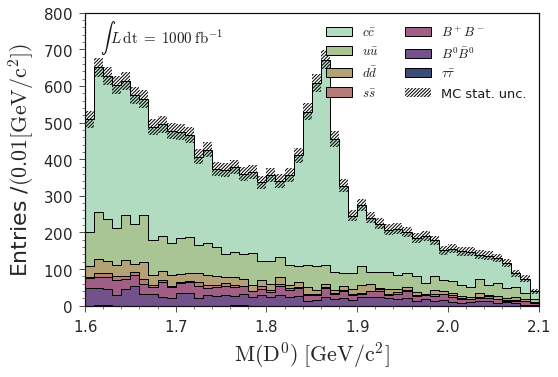

In [57]:
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

# img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tag_pre_sel_D0M.png"
img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tight_selv0_sel_D0M.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[ 110.  136.  157.  148.  218.  217.  222.  300.  280.  289.  374.  396.
  578. 1012.  681.  460.  389.  356.  386.  337.  362.  362.  333.  341.
  357.  346.  324.  331.  345.  361.  329.  313.  371.  378.  329.  374.
  333.  337.  383.  365.  395.  396.  394.  382.  364.  377.  336.  289.
  262.  224.]
fitst_bin_entries=110.0


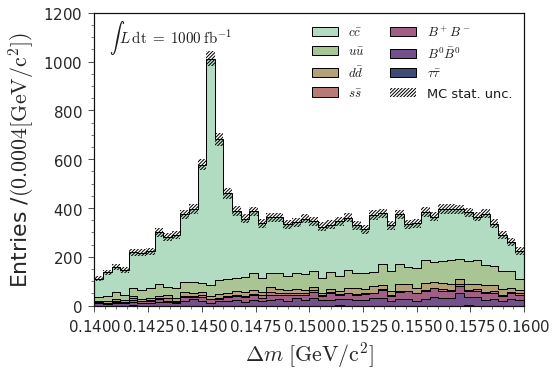

In [58]:
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0.140,0.16)
nbins = 50
xlabel = "$\Delta m$"

# img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tag_pre_sel_Dstarp_delM.png"
img_path = plot_directory + "/MC15ri_D0etaeta_pipi_tight_selv0_sel_delM.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)